## Ernie Sumoso - ID: 881591
## Lab 11 - Sequence Modeling with LSTM

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Embedding
from keras.utils import pad_sequences
from keras.datasets import imdb
import matplotlib.pyplot as plt

In [2]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
X_train.shape, X_test.shape

((25000,), (25000,))

In [4]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [5]:
len(X_train[0]), len(X_train[3])

(218, 550)

In [6]:
max_review_length = 500
X_train = pad_sequences(X_train, maxlen=max_review_length,)
X_test = pad_sequences(X_test, maxlen=max_review_length)

In [7]:
len(X_train[0]), len(X_train[3])

(500, 500)

In [8]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [9]:
embedding_vector_length = 32

In [10]:
model = Sequential()
model.add(Embedding(input_dim=top_words,
                    output_dim=embedding_vector_length,
                    input_length=max_review_length))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
history=model.fit(X_train,
                  y_train,
                  batch_size=256,
                  epochs=10,
                  validation_split=0.2,
                  verbose=True)

Epoch 1/10
79/79 [==============================] - 60s 589ms/step - loss: 0.6610 - accuracy: 0.6237 - val_loss: 0.5968 - val_accuracy: 0.7214
Epoch 2/10
79/79 [==============================] - 67s 838ms/step - loss: 0.3971 - accuracy: 0.8296 - val_loss: 0.3594 - val_accuracy: 0.8410
Epoch 3/10
79/79 [==============================] - 54s 667ms/step - loss: 0.2841 - accuracy: 0.8868 - val_loss: 0.3303 - val_accuracy: 0.8598
Epoch 4/10
79/79 [==============================] - 60s 768ms/step - loss: 0.2252 - accuracy: 0.9161 - val_loss: 0.3379 - val_accuracy: 0.8704
Epoch 5/10
79/79 [==============================] - 46s 577ms/step - loss: 0.1955 - accuracy: 0.9276 - val_loss: 0.3057 - val_accuracy: 0.8748
Epoch 6/10
79/79 [==============================] - 30s 385ms/step - loss: 0.1867 - accuracy: 0.9312 - val_loss: 0.3387 - val_accuracy: 0.8730
Epoch 7/10
79/79 [==============================] - 40s 505ms/step - loss: 0.1620 - accuracy: 0.9406 - val_loss: 0.3409 - val_accuracy: 0.8750

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 168s 215ms/step - loss: 0.4198 - accuracy: 0.8633


[0.41977065801620483, 0.8632799983024597]

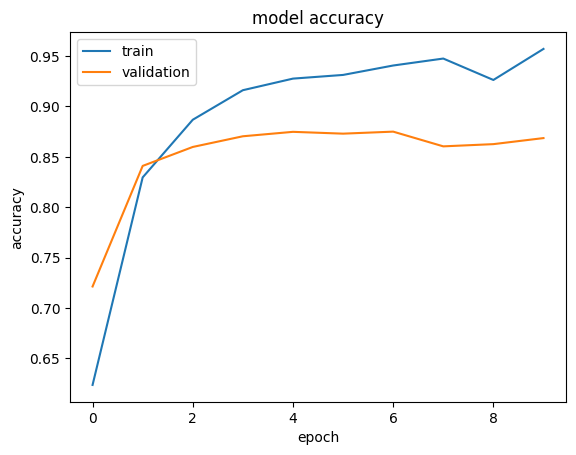

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()